In [1]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/Users/aslahmp/anaconda3/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/Users/aslahmp/anaconda3/lib/python3.11/site-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/Users/aslahmp/anaconda3/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 736, in start
    self.io_loop.start()
  File "/Users

AttributeError: _ARRAY_API not found

ImportError: numpy.core.multiarray failed to import

In [180]:
image_file = 'image.png'
input_image = imread(image_file)


In [181]:

grayscale_image= np.mean(input_image, axis=2)

/var/folders/y9/2rxtmq5d4rs75j3fynzjqhxh0000gn/T/ipykernel_90764/2052145022.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


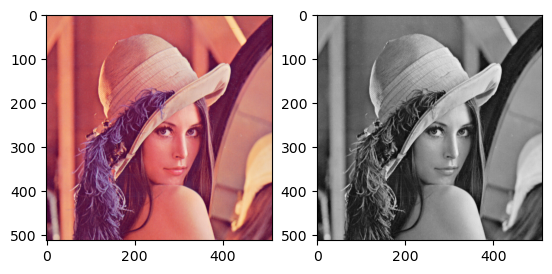

In [182]:
fig1 = plt.figure(1)
ax1, ax2 = fig1.add_subplot(121), fig1.add_subplot(122)
ax1.imshow(input_image)
ax2.imshow(grayscale_image, cmap=plt.get_cmap('gray'))
fig1.show()

In [183]:
def convolve(image, kernel):
    kernel_size = kernel.shape[0]
    padded_image = np.pad(image, kernel_size//2, mode='constant')
    convolved_image = np.zeros_like(image)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            convolved_image[i, j] = np.sum(padded_image[i:i+kernel_size, j:j+kernel_size] * kernel)
    return convolved_image

In [184]:
def gaussian_blur(image, kernel_size=5, sigma=1.4):
    kernel = create_gaussian_kernel(kernel_size, sigma)
    blurred_image = convolve(image, kernel)
    return blurred_image
def create_gaussian_kernel(kernel_size, sigma):
    kernel = np.fromfunction(lambda x, y: (1 / (2 * np.pi * sigma**2)) * np.exp(-((x - kernel_size//2)**2 + (y - kernel_size//2)**2) / (2 * sigma**2)), (kernel_size, kernel_size))
    return kernel

In [185]:
blurred_image = gaussian_blur(grayscale_image)

In [186]:

Gx = np.array([[1.0, 0.0, -1.0], [2.0, 0.0, -2.0], [1.0, 0.0, -1.0]])
Gy = np.array([[1.0, 2.0, 1.0], [0.0, 0.0, 0.0], [-1.0, -2.0, -1.0]])
gradient_x = convolve(blurred_image, Gx)
gradient_y = convolve(blurred_image, Gy)
gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
gradient_direction = np.arctan2(gradient_y, gradient_x)


/var/folders/y9/2rxtmq5d4rs75j3fynzjqhxh0000gn/T/ipykernel_90764/3253998019.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig3.show()


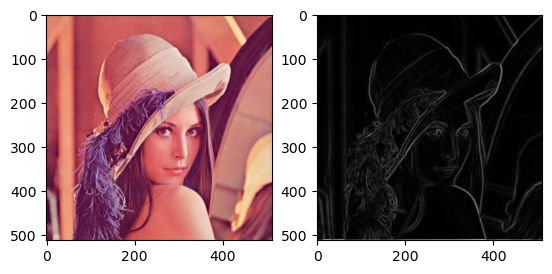

In [187]:
fig3 = plt.figure(2)
ax1, ax2 = fig3.add_subplot(121), fig3.add_subplot(122)
ax1.imshow(input_image, )
ax2.imshow(gradient_magnitude,  cmap=plt.get_cmap('gray'))
fig3.show()

In [188]:
def non_maximum_suppression(gradient_magnitude, gradient_direction):
    nms = np.zeros_like(gradient_magnitude)
    gradient_angle = np.rad2deg(gradient_direction) % 180

    for i in range(1, nms.shape[0] - 1):
        for j in range(1, nms.shape[1] - 1):
            angle = gradient_angle[i, j]
            
            if (0 <= angle < 22.5) or (157.5 <= angle <= 180):
                before = gradient_magnitude[i, j-1]
                after = gradient_magnitude[i, j+1]
            elif (22.5 <= angle < 67.5):
                before = gradient_magnitude[i-1, j+1]
                after = gradient_magnitude[i+1, j-1]
            elif (67.5 <= angle < 112.5):
                before = gradient_magnitude[i-1, j]
                after = gradient_magnitude[i+1, j]
            else:
                before = gradient_magnitude[i-1, j-1]
                after = gradient_magnitude[i+1, j+1]
            
            if gradient_magnitude[i, j] >= before and gradient_magnitude[i, j] >= after:
                nms[i, j] = gradient_magnitude[i, j]

    return nms

In [189]:
suppressed_image = non_maximum_suppression(gradient_magnitude, gradient_direction)

In [259]:
low_threshold=np.max(suppressed_image)*0.01
high_threshold=np.max(suppressed_image)*0.5

In [260]:
strong_edges = (suppressed_image > high_threshold).astype(np.uint8)
weak_edges = ((suppressed_image >= low_threshold) & (suppressed_image <= high_threshold)).astype(np.uint8)

In [261]:

strong_edges.sum(), weak_edges.sum(), suppressed_image.sum()

(1188, 36280, 5213.6978)

In [262]:
final_edges = np.zeros_like(suppressed_image, dtype=np.uint8)
strong_i, strong_j = np.where(strong_edges == 1)
        
for i in range(len(strong_i)):
    x, y = strong_i[i], strong_j[i]
    final_edges[x, y] = 255

    for dx in [-1, 0, 1]:
        for dy in [-1, 0, 1]:
            if weak_edges[x+dx, y+dy] == 1:
                final_edges[x+dx, y+dy] = 255
        


/var/folders/y9/2rxtmq5d4rs75j3fynzjqhxh0000gn/T/ipykernel_90764/2825644777.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig3.show()


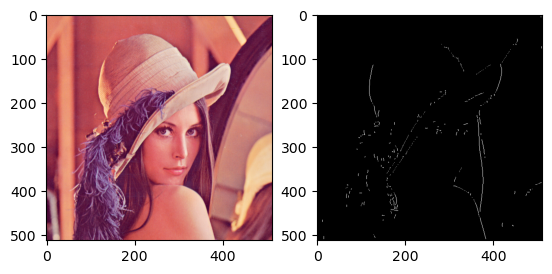

In [263]:
fig3 = plt.figure(3)
ax1, ax2 = fig3.add_subplot(121), fig3.add_subplot(122)
ax1.imshow(input_image, )
ax2.imshow(final_edges,  cmap=plt.get_cmap('gray'))

fig3.show()
